         AT      V       AP     RH      PE
0      8.34  40.77  1010.84  90.01  480.48
1     23.64  58.49  1011.40  74.20  445.75
2     29.74  56.90  1007.15  41.91  438.76
3     19.07  49.69  1007.22  76.79  453.09
4     11.80  40.66  1017.13  97.20  464.43
...     ...    ...      ...    ...     ...
9563  15.12  48.92  1011.80  72.93  462.59
9564  33.41  77.95  1010.30  59.72  432.90
9565  15.99  43.34  1014.20  78.66  465.96
9566  17.65  59.87  1018.58  94.65  450.93
9567  23.68  51.30  1011.86  71.24  451.67

[9568 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


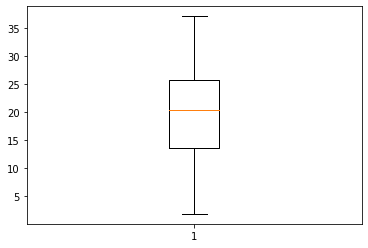

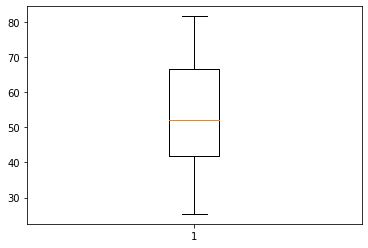

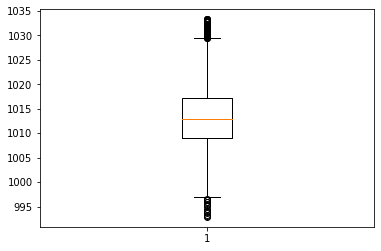

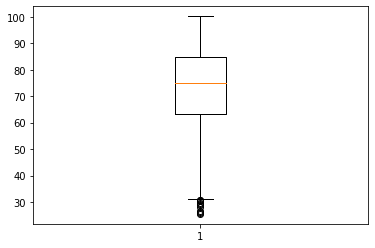

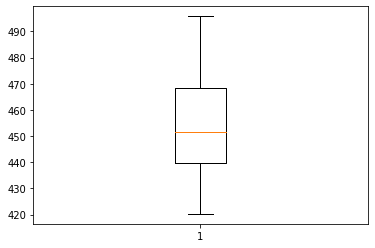

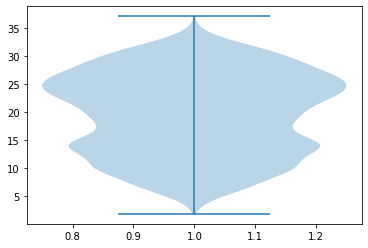

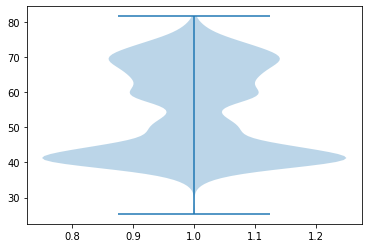

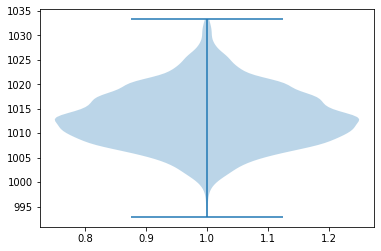

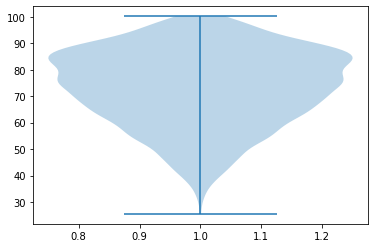

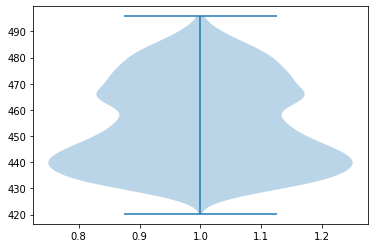

         AT      V       AP     RH      PE
0      8.34  40.77  1010.84  90.01  480.48
1     23.64  58.49  1011.40  74.20  445.75
2     29.74  56.90  1007.15  41.91  438.76
3     19.07  49.69  1007.22  76.79  453.09
4     11.80  40.66  1017.13  97.20  464.43
...     ...    ...      ...    ...     ...
9563  15.12  48.92  1011.80  72.93  462.59
9564  33.41  77.95  1010.30  59.72  432.90
9565  15.99  43.34  1014.20  78.66  465.96
9566  17.65  59.87  1018.58  94.65  450.93
9567  23.68  51.30  1011.86  71.24  451.67

[9568 rows x 5 columns]
Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
[[0.00742253 0.03628494 0.89963861 0.0801081  0.42762293]
 [0.02130587 0.05271491 0.91153798 0.06687376 0.40173824]
 [0.0270058  0.05166881 0.91455601 0.03805694 0.39842188]
 ...
 [0.01427882 0.03870195 0.90566503 0.07024217 0.41609513]
 [0.01576334 0.05347033 0.90970114 0.0845326  0.40272883]
 [0.0212985  0.04614074 0.91009693 0.06407537 0.40624541]]
             0         1         2         3        

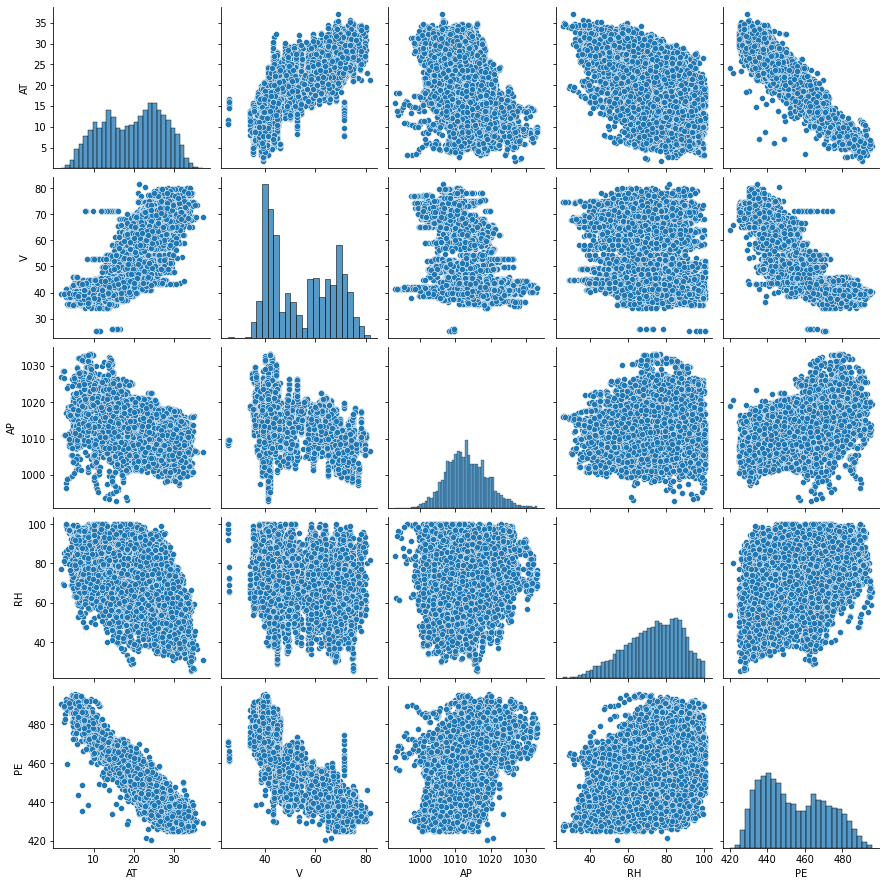

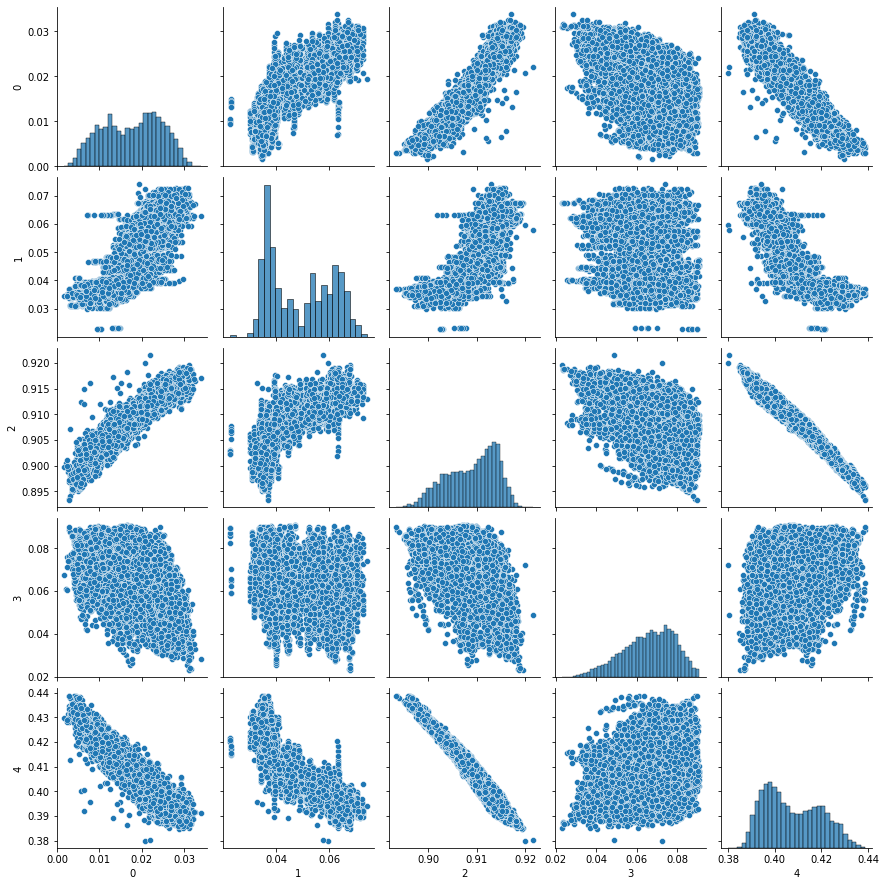

In [1]:
#importing necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
#importing the dataset:
a=pd.read_csv("../input/power-plant-data/Folds5x2_pp.csv")
print(a)
#summary statistics:
a.info()
a.describe()
#checking for outliers:
for i in range(len(a.columns)):
    plt.boxplot(a.iloc[:,i])
    plt.show()
#checking for the distribution using violin plot:
for i in range(len(a.columns)):
    plt.violinplot(a.iloc[:,i])
    plt.show()
#checking linearity:
sns.pairplot(a)
a.corr(method="spearman")
print(a)
col=a.columns
print(col)
#np_scaled = min_max_scaler.fit_transform(a)
#a_norm = pd.DataFrame(np_scaled, columns = col)
#a_norm
#normalizing the data:
a_nor=preprocessing.normalize(a)
print(a_nor)
a_nor=pd.DataFrame(a_nor)
print(a_nor)
sns.pairplot(a_nor)
a_nor.corr()
a_nor.columns = a.columns
a_nor.head()
x=a_nor.iloc[:,0:4]
y=a_nor.iloc[:,4]
#splitting train set:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#fitting linear model:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
pred=lm.predict(X_train)
print(pred)
print(model.coef_)
print(model.intercept_)
#checking accuracy:
from sklearn.metrics import r2_score
print(r2_score(pred,y_train))
predd = lm.predict(X_test)
print(r2_score(predd,y_test))